In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
df = pd.read_csv('data/DRUG1n.csv') 
df.head()

,Age,Sex,BP,Cholesterol,Na,K,Drug
0,23,F,HIGH,HIGH,0.792535,0.031258,drugY
1,47,M,LOW,HIGH,0.739309,0.056468,drugC
2,47,M,LOW,HIGH,0.697269,0.068944,drugC
3,28,F,NORMAL,HIGH,0.563682,0.072289,drugX
4,61,F,LOW,HIGH,0.559294,0.030998,drugY


In [19]:
df.shape

(200, 7)

In [20]:
#查找缺失值
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na             0
K              0
Drug           0
dtype: int64

分类特征数值化以及one-hot编码

In [21]:
# F : 0, M: 1
df['Sex'] = df['Sex'].map({'F':0,'M':1})
df['Sex'].unique()

array([0, 1], dtype=int64)

In [22]:
# HIGH : 0 , NORMAL: 1
df['Cholesterol'] = df['Cholesterol'].map({'HIGH':0,'NORMAL':1})
df['Cholesterol'].unique()

array([0, 1], dtype=int64)

In [23]:
for i in ['BP','Drug']:
    dummies = pd.get_dummies(df[i])
    df = pd.concat([df,dummies],axis =1)
    df.drop(i,axis = 1,inplace = True)
df = df.rename(columns={'HIGH': 'BP_HIGH'})
df = df.rename(columns={'LOW': 'BP_LOW'})
df = df.rename(columns={'NORMAL': 'BP_NORMAL'})
df.head()

,Age,Sex,Cholesterol,Na,K,BP_HIGH,BP_LOW,BP_NORMAL,drugA,drugB,drugC,drugX,drugY
0,23,0,0,0.792535,0.031258,1,0,0,0,0,0,0,1
1,47,1,0,0.739309,0.056468,0,1,0,0,0,1,0,0
2,47,1,0,0.697269,0.068944,0,1,0,0,0,1,0,0
3,28,0,0,0.563682,0.072289,0,0,1,0,0,0,1,0
4,61,0,0,0.559294,0.030998,0,1,0,0,0,0,0,1


In [24]:
df.shape

(200, 13)

In [25]:
# # 设置标签 用来标记聚类结果
# df['class'] = np.zeros([df.shape[0]])
# # 设置列表 用来确定 哪些坐标是聚类中心
# k_center = {}
# #准备可视化的列 三个数值列
# # temp = df[['Age','K','class']]
df.head()

,Age,Sex,Cholesterol,Na,K,BP_HIGH,BP_LOW,BP_NORMAL,drugA,drugB,drugC,drugX,drugY
0,23,0,0,0.792535,0.031258,1,0,0,0,0,0,0,1
1,47,1,0,0.739309,0.056468,0,1,0,0,0,1,0,0
2,47,1,0,0.697269,0.068944,0,1,0,0,0,1,0,0
3,28,0,0,0.563682,0.072289,0,0,1,0,0,0,1,0
4,61,0,0,0.559294,0.030998,0,1,0,0,0,0,0,1


In [26]:
std = StandardScaler()
data = std.fit_transform(df)
data.shape

(200, 13)

In [27]:
# 计算两个向量的欧氏距离
def distance_euclidean(vector_a, vector_b):
    return np.sqrt(np.sum(np.power(vector_a - vector_b, 2)))


# 构建k个初始簇质心
def rand_centroids(data_set, k):
    m = np.shape(data_set)[0]  # 总样本数
    centroids_idx = set()  # 随机样本索引
    while len(centroids_idx) < k:
        rand_j = np.random.randint(m)
        centroids_idx.add(rand_j)
    centroids = data_set[list(centroids_idx)]  # 初始簇质心
    return centroids


# K-均值聚类方法
def k_means(data_set, k):
    m = np.shape(data_set)[0]  # 样本总数
    cluster_result = np.mat(np.zeros((m, 2)))  # 簇分配结果矩阵
    centroids = rand_centroids(data_set, k)  # 构建k个初始随机质心

    cluster_changed = True  # 簇变化标志
    while cluster_changed:
        cluster_changed = False
        for i in range(m):
            min_dist = np.inf  # 样本点离最近质心的距离
            min_idx = -1  # 样本的簇标记
            for j in range(k):
                dist_ij = distance_euclidean(centroids[j, :], data_set[i, :])  # 样本点I到质心J的距离
                if dist_ij < min_dist:
                    min_dist = dist_ij
                    min_idx = j
            if cluster_result[i, 0] != min_idx:
                cluster_changed = True  # 样本点的簇标记发生变化
            cluster_result[i, :] = min_idx, min_dist ** 2  # 簇分配结果矩阵的两列分别为簇标记和误差
        for cent in range(k):  # 更新质心的位置
            centroids[cent, :] = np.mean(data_set[np.nonzero(cluster_result[:, 0].A == cent)[0]], axis=0)
    return centroids, cluster_result

In [28]:
center ,result = k_means(data, 3)
print("MSELoss: ", np.sum(result, axis=0)[0, 1])
result

MSELoss:  1736.315140756837


matrix([[ 1.        ,  6.00127966],
        [ 2.        , 16.14627666],
        [ 2.        , 15.74051579],
        [ 2.        ,  6.9911226 ],
        [ 1.        ,  8.21069233],
        [ 2.        ,  7.71868796],
        [ 1.        ,  6.7590189 ],
        [ 2.        , 16.48001043],
        [ 1.        ,  7.93346596],
        [ 1.        ,  8.41134146],
        [ 2.        , 20.22183417],
        [ 1.        ,  4.87556039],
        [ 1.        ,  6.00742215],
        [ 1.        ,  8.64563037],
        [ 2.        ,  7.41729383],
        [ 1.        ,  8.99957016],
        [ 2.        , 10.80997707],
        [ 0.        ,  6.42875776],
        [ 2.        , 18.31974481],
        [ 1.        ,  5.61287464],
        [ 1.        ,  8.71121288],
        [ 1.        ,  8.60920039],
        [ 1.        ,  5.93990693],
        [ 1.        ,  8.29570662],
        [ 1.        ,  6.82790943],
        [ 1.        ,  7.39109676],
        [ 1.        ,  5.19165454],
        [ 2.        ,  5.893

In [29]:
temp = result[:,0]
temp = temp.reshape(1,-1)
data = np.insert(data,13,temp,axis=1)
data

array([[-1.29159102, -1.040833  , -0.97043679, ..., -0.60816364,
         1.0944415 ,  1.        ],
       [ 0.16269866,  0.96076892, -0.97043679, ..., -0.60816364,
        -0.91370804,  2.        ],
       [ 0.16269866,  0.96076892, -0.97043679, ..., -0.60816364,
        -0.91370804,  2.        ],
       ...,
       [ 0.46567567,  0.96076892, -0.97043679, ...,  1.64429429,
        -0.91370804,  2.        ],
       [-1.29159102,  0.96076892,  1.03046381, ...,  1.64429429,
        -0.91370804,  2.        ],
       [-0.26146916, -1.040833  ,  1.03046381, ...,  1.64429429,
        -0.91370804,  2.        ]])

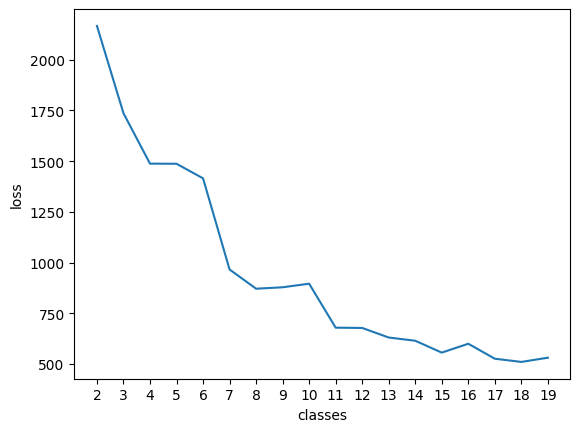

In [30]:
loss_list = []

for k in range(2, 20,1):
    center, result = k_means(data, k)
    loss = np.sum(result, axis=0)[0, 1]
    loss_list.append(loss)
plt.xlabel('classes')
plt.ylabel('loss')
my_x_ticks = np.arange(2, 20, 1)
plt.xticks(my_x_ticks)
plt.plot(range(2, 20 , 1), loss_list)

In [32]:
center ,result = k_means(data, 4)
print("MSELoss: ", np.sum(result, axis=0)[0, 1])

MSELoss:  1433.8835213823502
